# Aprendizaje No Supervisado


![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/unsupervised.png)

## Tareas y algoritmos del Aprendizaje no supervisado

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/unsupervisedalg.jpg)
Fuente de la imagen: 10.1016/j.cosrev.2020.100254

## Principal Component Analysis (PCA)

![](https://upload.wikimedia.org/wikipedia/commons/9/9c/PCA_Projection_Illustration.gif)
Fuente del gif: Wiki.

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/pca_andrewng1.png)

Fuente de la imagen: Machine Learning Lectures by Prof. Andrew NG at Stanford University

In [22]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
cancer_dataset = load_breast_cancer()
df_cancer = load_breast_cancer(as_frame=True).frame
X = cancer_dataset.data
y = cancer_dataset.target
labels = cancer_dataset.target_names
df_cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [33]:
labels

array(['malignant', 'benign'], dtype='<U9')

In [37]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components

print("explained variance ratio (first two components): %s"
       % str(pca.explained_variance_ratio_))


explained variance ratio (first two components): [0.98204467 0.01617649]


Text(0, 0.5, 'Componente principal 2')

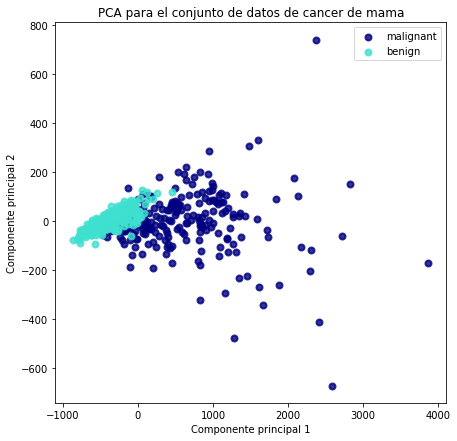

In [39]:
plt.figure(figsize=(7, 7))

colors = ["navy", "turquoise"]

lw = 2

for color, i, target_name in zip(colors, [0, 1], labels):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
    
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA para el conjunto de datos de cancer de mama")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")